In [1]:
import pandas as pd
import numpy as np
import warnings
from plotnine import *

from warnings import filterwarnings

pd.set_option("mode.copy_on_write", True)

df = pd.read_csv(
    "/Users/keonnartey/Desktop/PDS/opioid-2023-painkillers/00_Data_Cleaning_and_Merging/20_Merge_Data/merged.csv"
)

In [2]:
# loading the first few datasets for the dataframe.

df.head()

,COUNTY,STATE,State Name_x,Year,Deaths,Population,BUYER_COUNTY,BUYER_STATE,MME,CALC_BASE_WT_IN_GM,merge_indicator,Death Rate,MME Rate
0,acadia,Louisiana,Louisiana,2003,11.0,59209.0,NaN,NaN,NaN,NaN,left_only,0.000186,NaN
1,ada,Idaho,Idaho,2003,17.0,325482.0,NaN,NaN,NaN,NaN,left_only,0.000052,NaN
2,adams,Colorado,Colorado,2003,42.0,381370.0,NaN,NaN,NaN,NaN,left_only,0.000110,NaN
3,aiken,South Carolina,South Carolina,2003,10.0,146903.0,NaN,NaN,NaN,NaN,left_only,0.000068,NaN
4,alachua,Florida,Florida,2003,11.0,221717.0,NaN,NaN,NaN,NaN,left_only,0.000050,NaN


In [3]:
df.Year.unique()  # unique years in the dataframe for each county and state.

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015])

In [4]:
df.STATE.unique()

array(['Louisiana', 'Idaho', 'Colorado', 'South Carolina', 'Florida',
       'California', 'Maryland', 'Pennsylvania', 'Tennessee', 'Minnesota',
       'New Jersey', 'Alabama', 'Massachusetts', 'Kentucky', 'Washington',
       'West Virginia', 'New Mexico', 'Texas', 'Georgia', 'Missouri',
       'New York', 'North Carolina', 'Ohio', 'Michigan', 'Virginia',
       'Oregon', 'Indiana', 'Nevada', 'Oklahoma', 'Arizona', 'Illinois',
       'Maine', 'Wisconsin', 'Utah', 'District of Columbia',
       'Connecticut', 'Mississippi', 'Hawaii', 'New Hampshire', 'Kansas',
       'Delaware', 'Rhode Island', 'Montana', 'Iowa', 'Arkansas',
       'Nebraska', 'Vermont', 'Wyoming', 'South Dakota', 'North Dakota'],
      dtype=object)

#### Control State 1

Florida, Effective February, 2010


In [5]:
florida = df[df.STATE == "Florida"]

before_policy_florida = florida[
    florida.Year < 2010
]  # subsetting the data before the the policy
after_policy_florida = florida[
    florida.Year >= 2010
]  # a subset of the data after the policy was passed

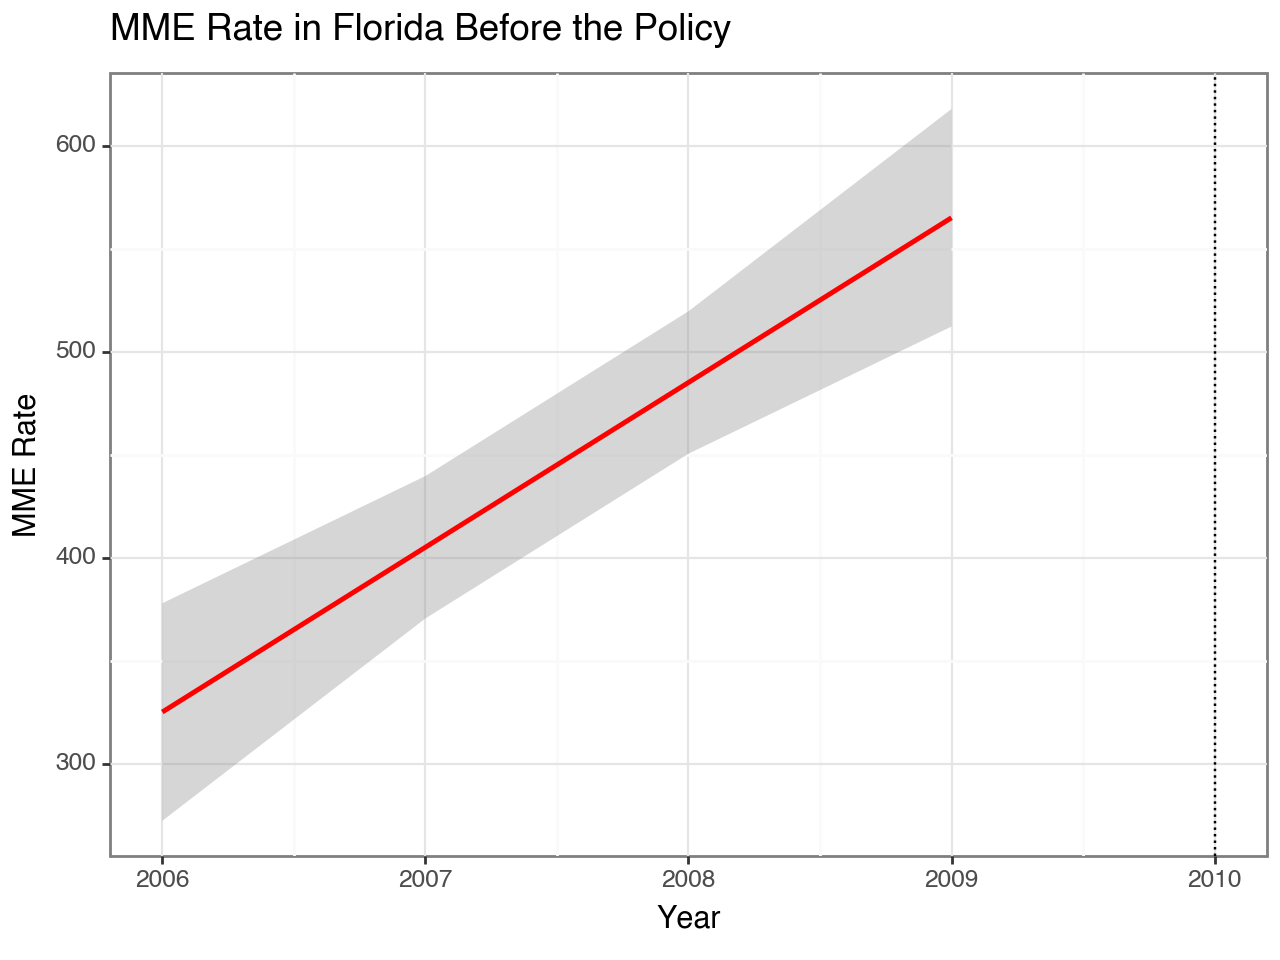

<Figure Size: (640 x 480)>

In [6]:
(
    ggplot()
    + geom_smooth(
        before_policy_florida, aes("Year", "MME Rate"), method="lm", color="red"
    )
    + geom_vline(xintercept=2010, linetype="dotted")
    + xlab("Year")
    + ylab("MME Rate")
    + labs(title="MME Rate in Florida Before the Policy")
    + theme_bw()
)

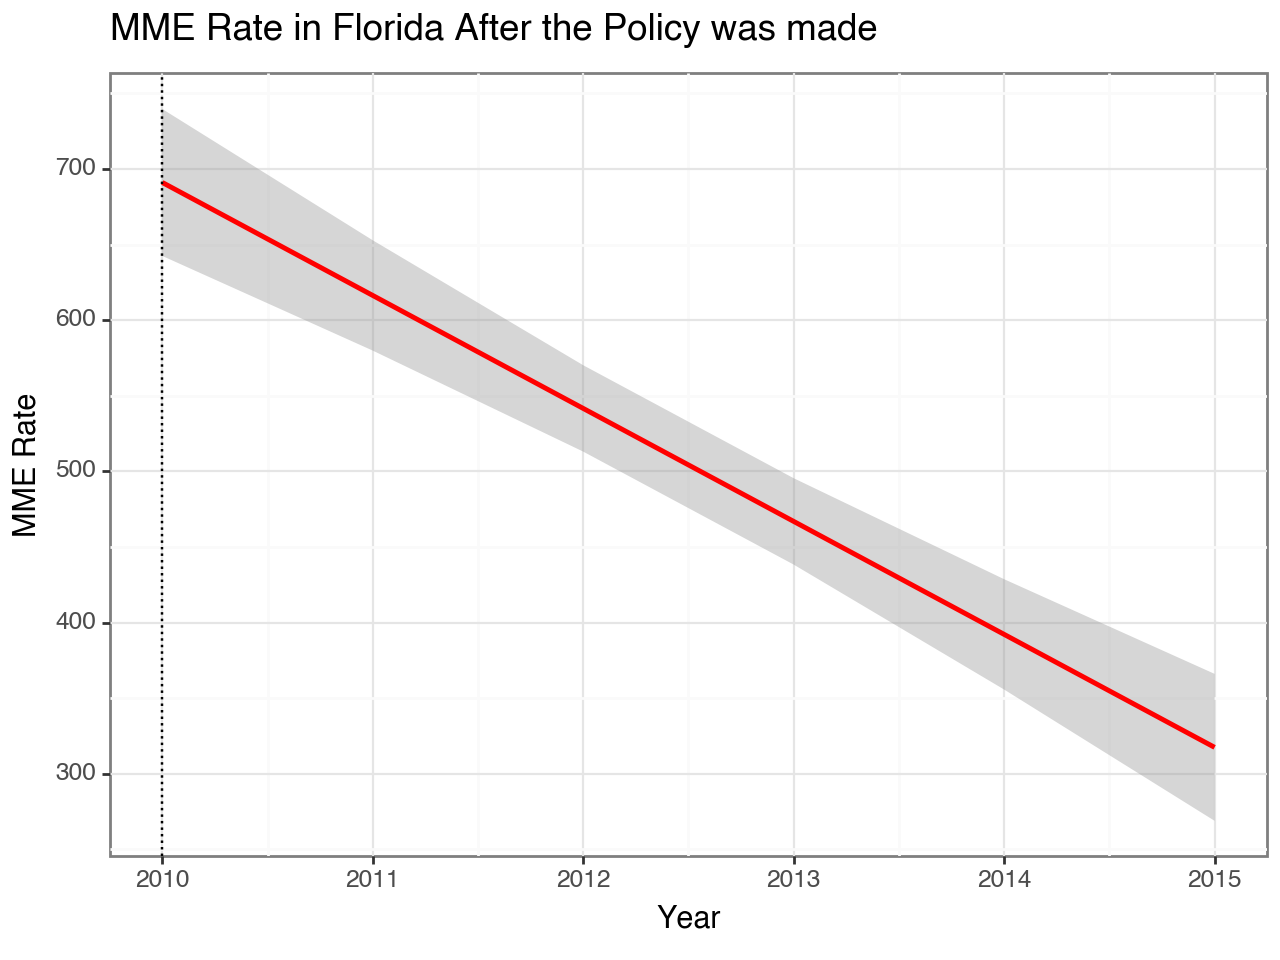

<Figure Size: (640 x 480)>

In [7]:
(
    ggplot()
    + geom_smooth(
        after_policy_florida, aes("Year", "MME Rate"), method="lm", color="red"
    )
    + geom_vline(xintercept=2010, linetype="dotted")
    + xlab("Year")
    + ylab("MME Rate")
    + labs(title="MME Rate in Florida After the Policy was made")
    + theme_bw()
)

#### Deaths in Florida

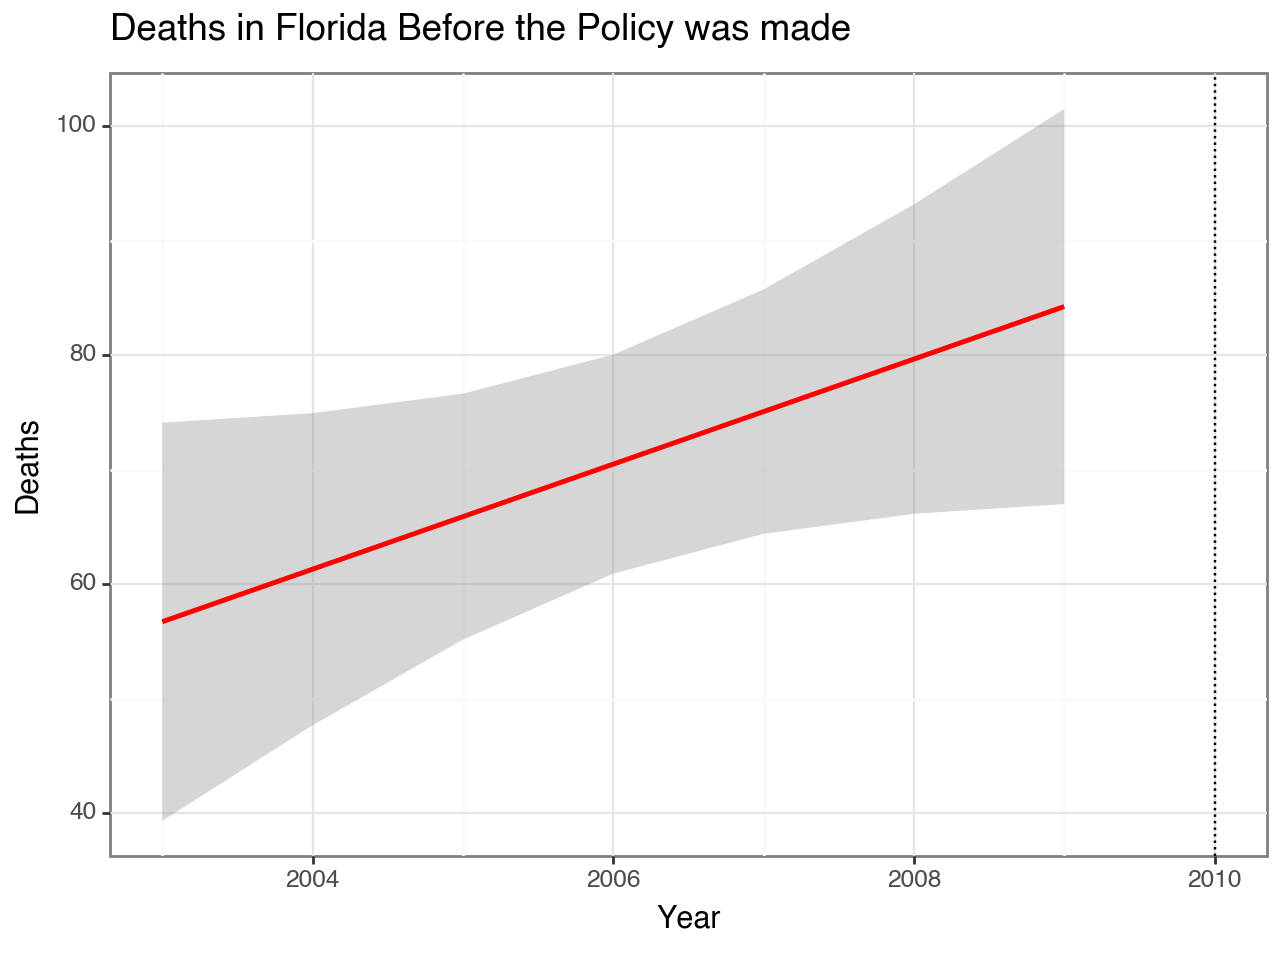

<Figure Size: (640 x 480)>

In [8]:
(
    ggplot()
    + geom_smooth(
        before_policy_florida, aes("Year", "Deaths"), method="lm", color="red"
    )
    + geom_vline(xintercept=2010, linetype="dotted")
    + xlab("Year")
    + ylab("Deaths")
    + labs(title="Deaths in Florida Before the Policy was made")
    + theme_bw()
)

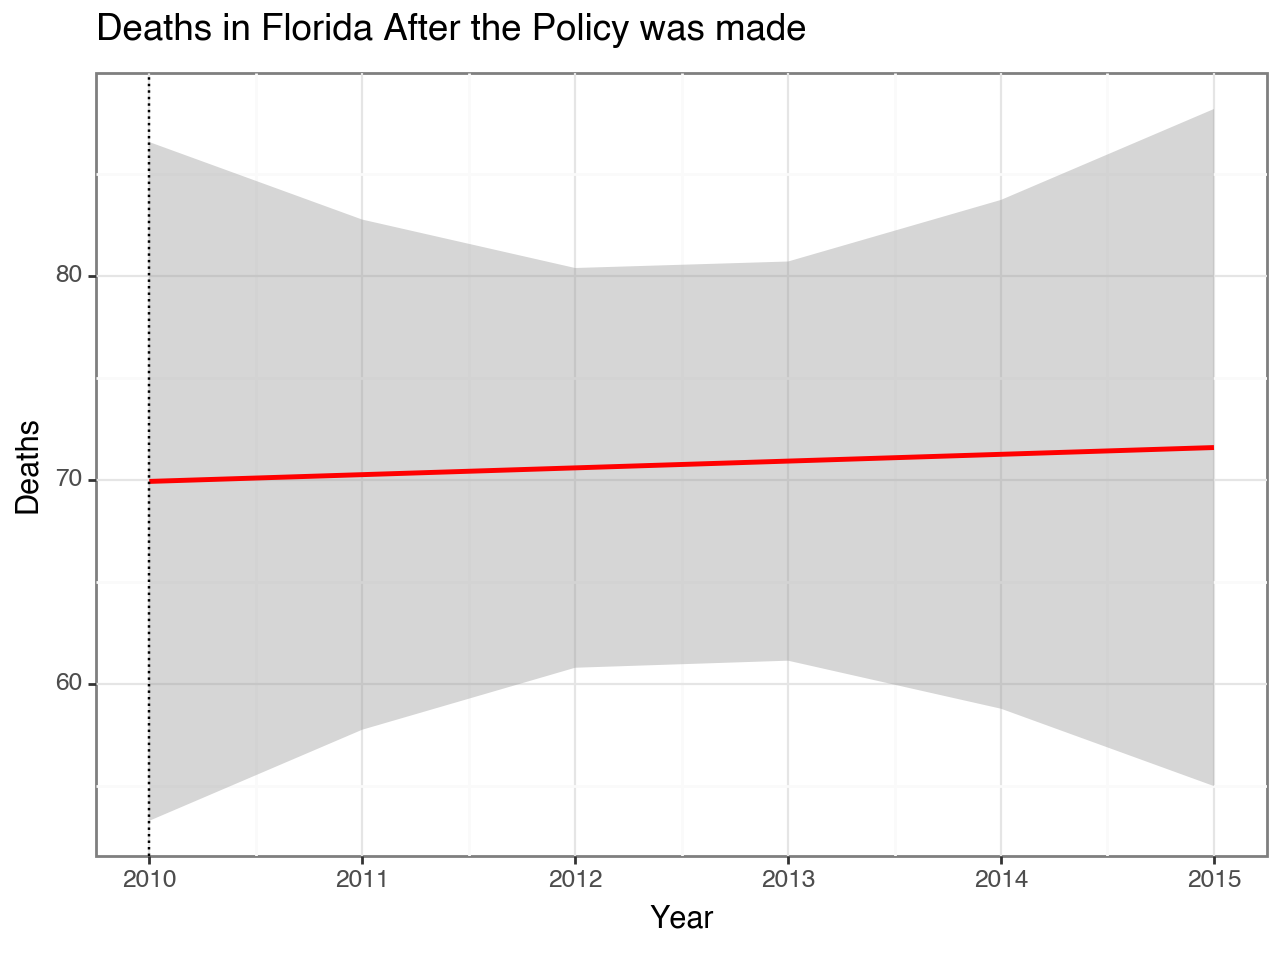

<Figure Size: (640 x 480)>

In [9]:
(
    ggplot()
    + geom_smooth(after_policy_florida, aes("Year", "Deaths"), method="lm", color="red")
    + geom_vline(xintercept=2010, linetype="dotted")
    + xlab("Year")
    + ylab("Deaths")
    + labs(title="Deaths in Florida After the Policy was made")
    + theme_bw()
)

#### choosing control states for Florida

In [10]:
state_list = [
    "Ohio",
    "Colorado",
    "Rhode Island",
    "South Carolina",
    "Georgia",
]  # using these states as control state for Florida
con_state = df[df.STATE.isin(state_list)]
bf_1 = con_state[con_state.Year < 2010]
af_1 = con_state[con_state.Year >= 2010]

#### Shipment in Control States

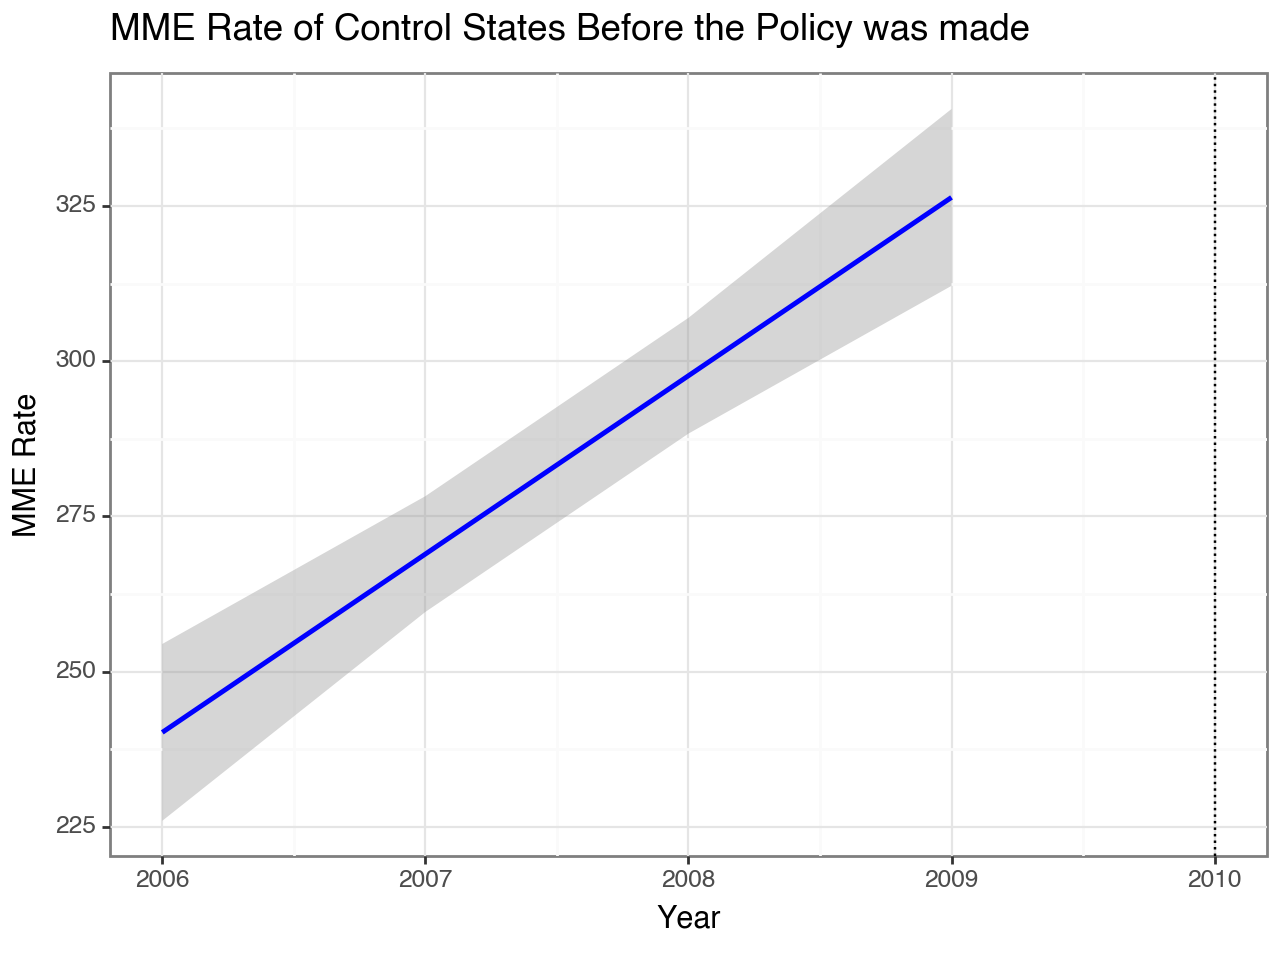

<Figure Size: (640 x 480)>

In [11]:
(
    ggplot()
    + geom_smooth(bf_1, aes("Year", "MME Rate"), method="lm", color="blue")
    + geom_vline(xintercept=2010, linetype="dotted")
    + xlab("Year")
    + ylab("MME Rate")
    + labs(title="MME Rate of Control States Before the Policy was made")
    + theme_bw()
)

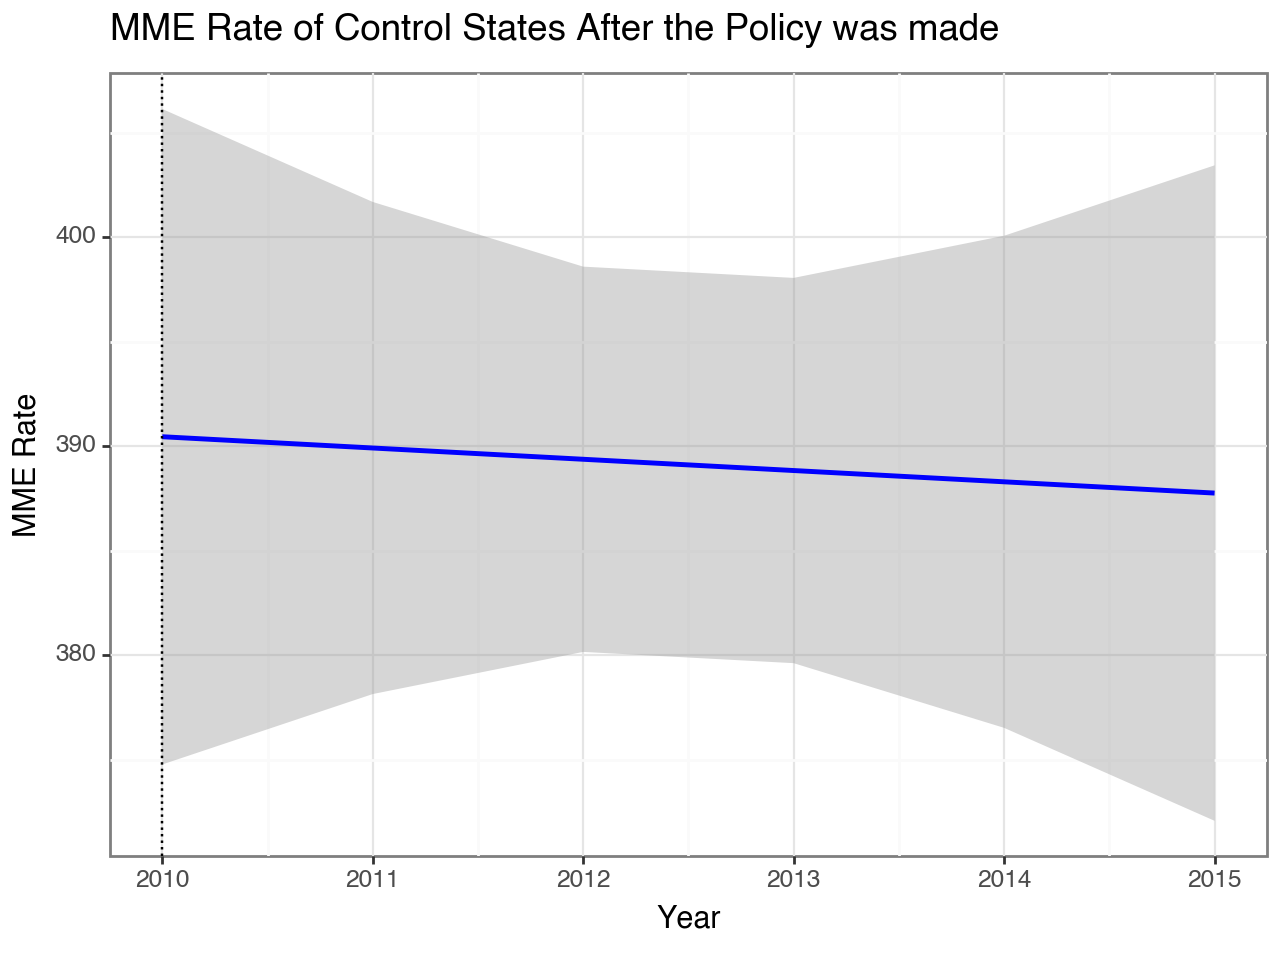

<Figure Size: (640 x 480)>

In [12]:
(
    ggplot()
    + geom_smooth(af_1, aes("Year", "MME Rate"), method="lm", color="blue")
    + geom_vline(xintercept=2010, linetype="dotted")
    + xlab("Year")
    + ylab("MME Rate")
    + labs(title="MME Rate of Control States After the Policy was made")
    + theme_bw()
)

#### Deaths in Control States

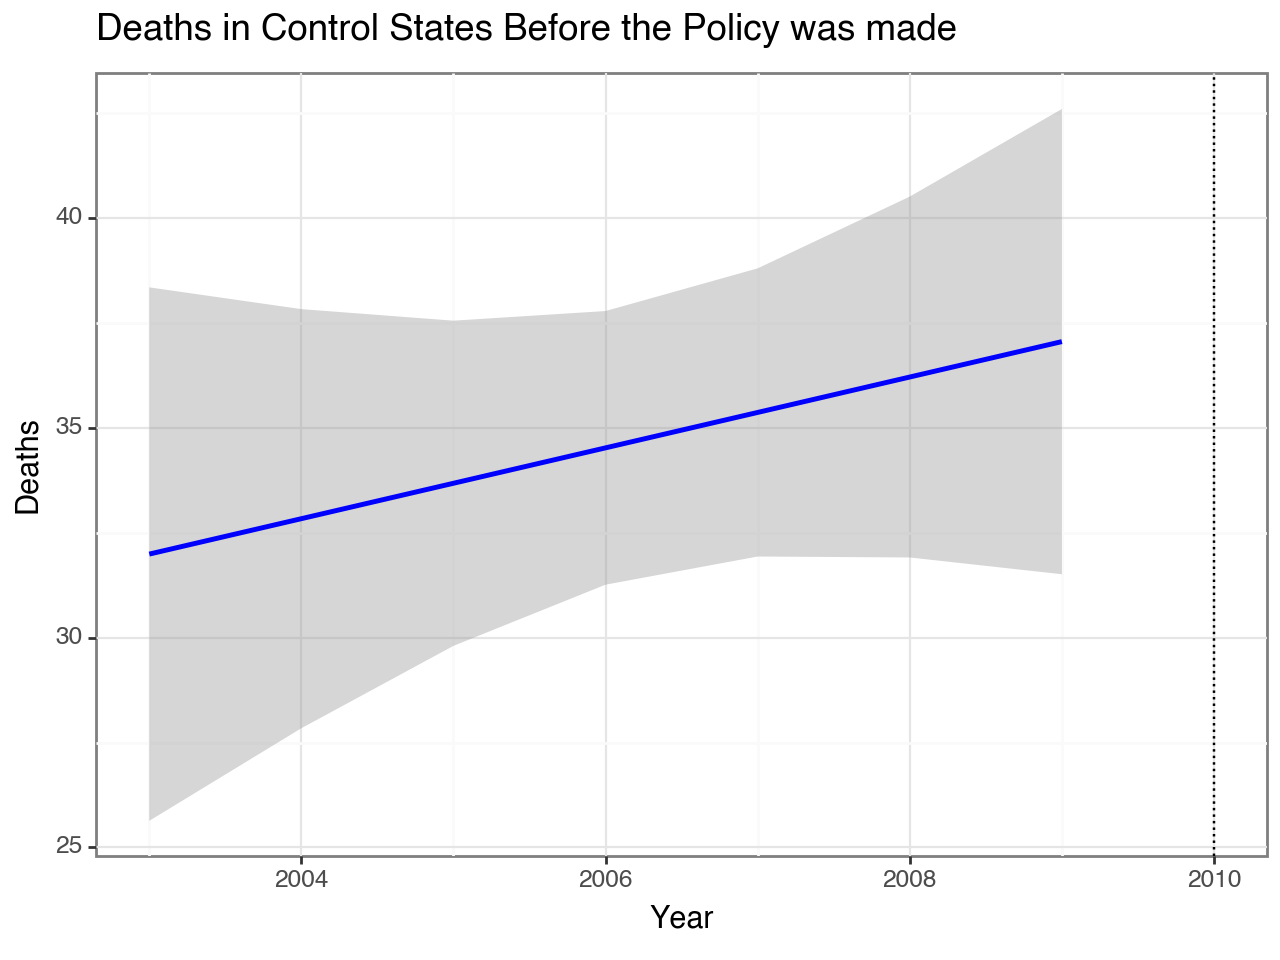

<Figure Size: (640 x 480)>

In [13]:
(
    ggplot()
    + geom_smooth(bf_1, aes("Year", "Deaths"), method="lm", color="blue")
    + geom_vline(xintercept=2010, linetype="dotted")
    + xlab("Year")
    + ylab("Deaths")
    + labs(title="Deaths in Control States Before the Policy was made")
    + theme_bw()
)

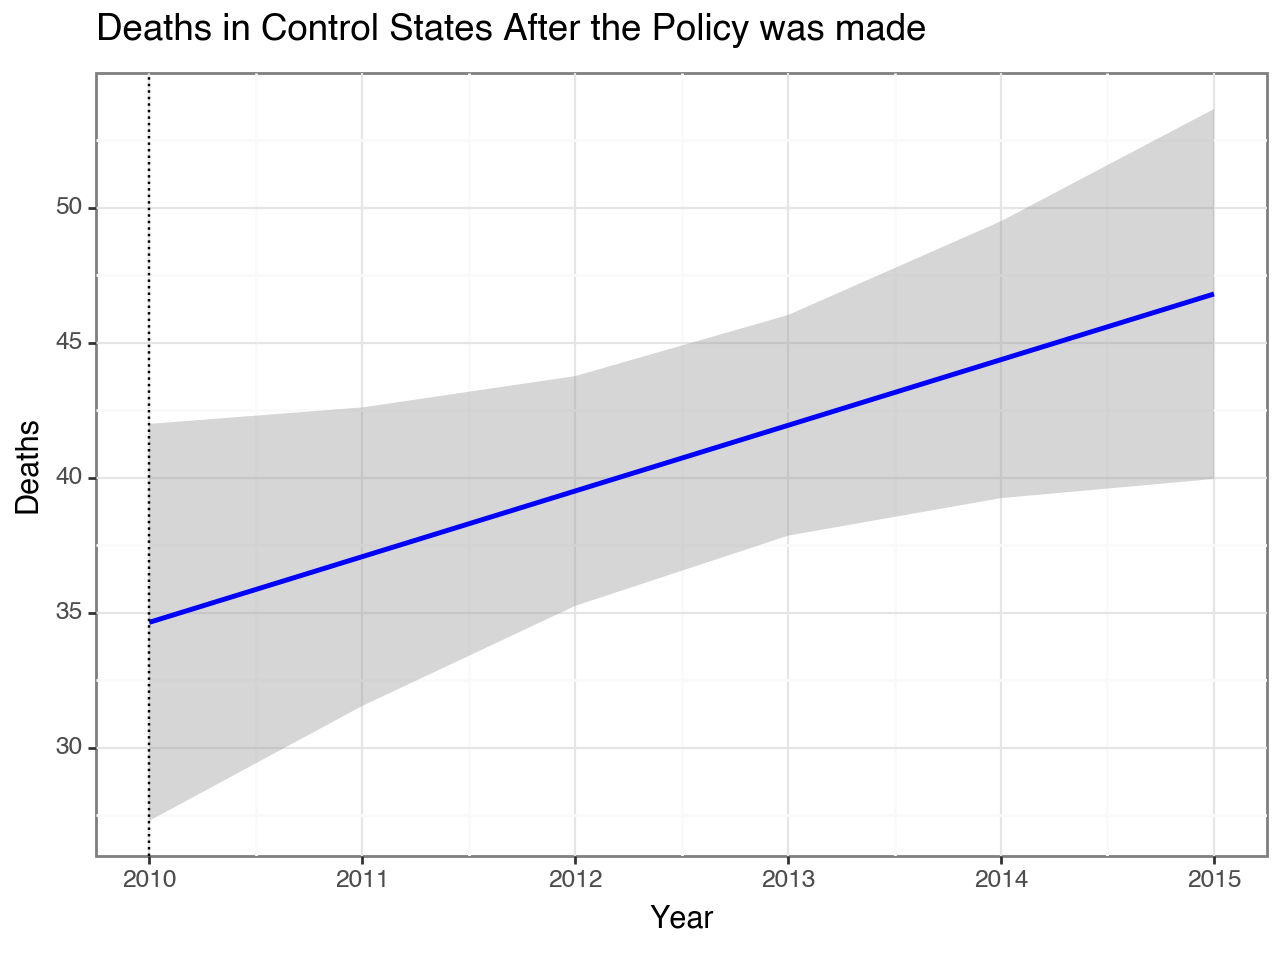

<Figure Size: (640 x 480)>

In [14]:
(
    ggplot()
    + geom_smooth(af_1, aes("Year", "Deaths"), method="lm", color="blue")
    + geom_vline(xintercept=2010, linetype="dotted")
    + xlab("Year")
    + ylab("Deaths")
    + labs(title="Deaths in Control States After the Policy was made")
    + theme_bw()
)

#### Comparing MME shipments in Florida vs Control States

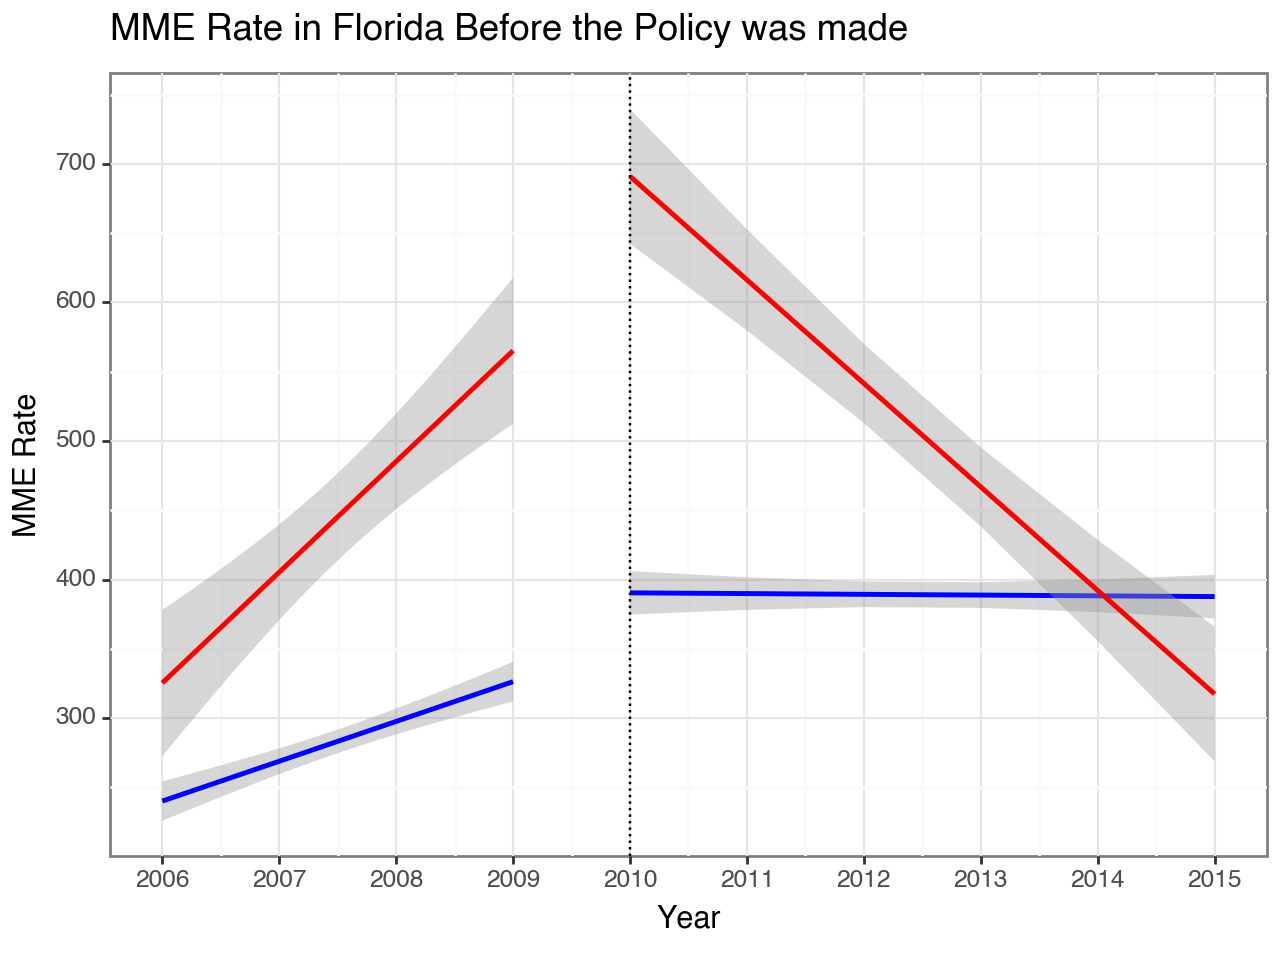

<Figure Size: (640 x 480)>

In [15]:
(
    ggplot()
    + geom_smooth(bf_1, aes("Year", "MME Rate"), method="lm", color="blue")
    + geom_smooth(af_1, aes("Year", "MME Rate"), method="lm", color="blue")
    + geom_smooth(
        before_policy_florida, aes("Year", "MME Rate"), method="lm", color="red"
    )
    + geom_smooth(
        after_policy_florida, aes("Year", "MME Rate"), method="lm", color="red"
    )
    + geom_vline(xintercept=2010, linetype="dotted")
    + xlab("Year")
    + ylab("MME Rate")
    + labs(title="MME Rate in Florida Before the Policy was made")
    + scale_x_continuous(
        breaks=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
        limits=[2006, 2015],
    )
    + theme_bw()
)

#### Comparing Deaths in Florida vs Control States

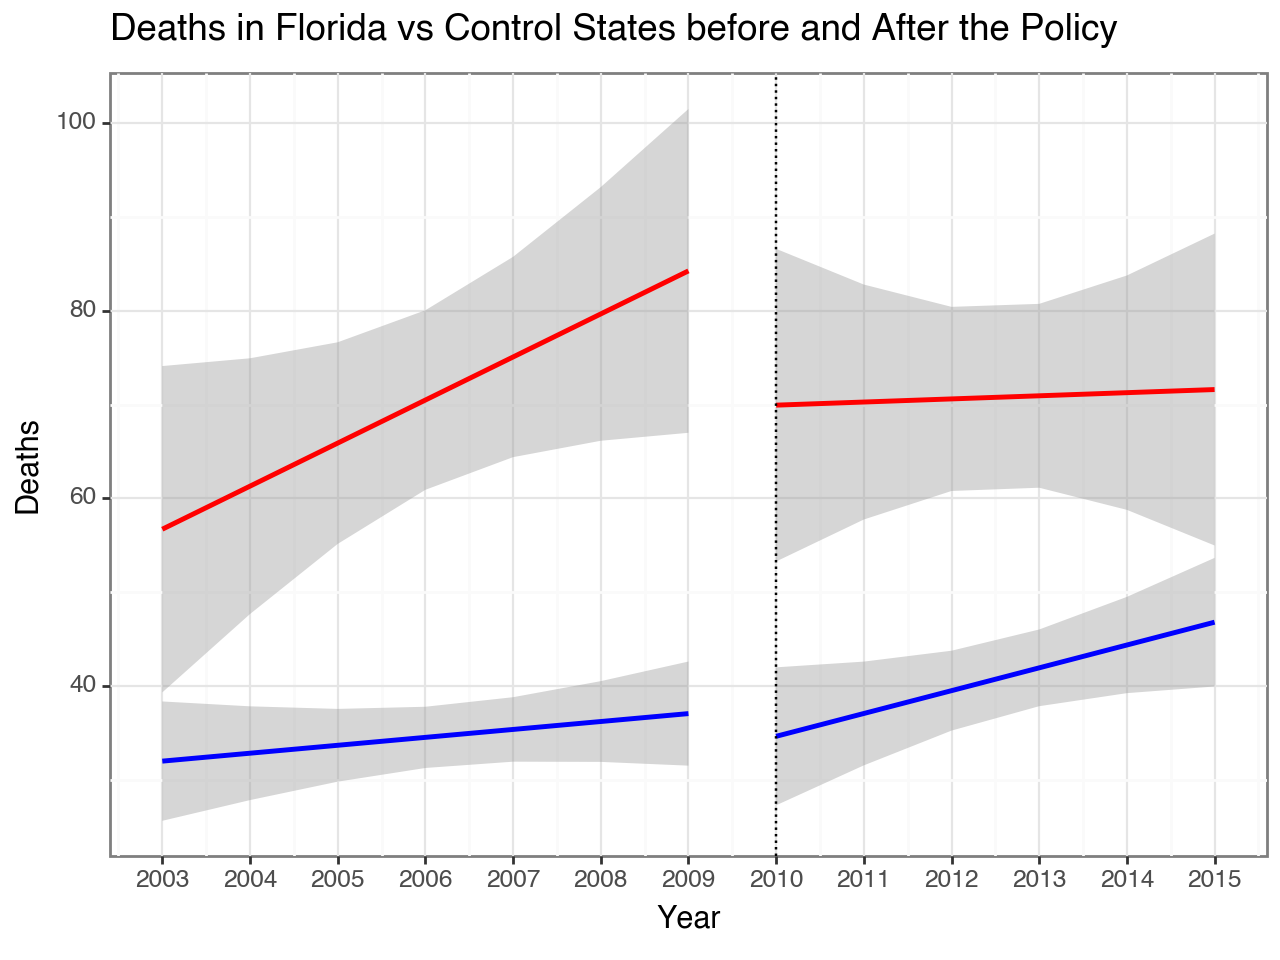

<Figure Size: (640 x 480)>

In [16]:
(
    ggplot()
    + geom_smooth(bf_1, aes("Year", "Deaths"), method="lm", color="blue")
    + geom_smooth(af_1, aes("Year", "Deaths"), method="lm", color="blue")
    + geom_smooth(
        before_policy_florida, aes("Year", "Deaths"), method="lm", color="red"
    )
    + geom_smooth(after_policy_florida, aes("Year", "Deaths"), method="lm", color="red")
    + geom_vline(xintercept=2010, linetype="dotted")
    + xlab("Year")
    + ylab("Deaths")
    + labs(title="Deaths in Florida vs Control States before and After the Policy")
    + scale_x_continuous(
        breaks=[
            2003,
            2004,
            2005,
            2006,
            2007,
            2008,
            2009,
            2010,
            2011,
            2012,
            2013,
            2014,
            2015,
        ],
        limits=[2003, 2015],
    )
    + theme_bw()
)

#### Control State 2
Texas: Effective January 4, 2007


In [17]:
texas = df[df.STATE == "Texas"]  # subsetting for Texas

before_policy_texas = texas[
    texas["Year"] < 2007
]  # subsetting the data before the the policy
after_policy_texas = texas[
    texas["Year"] >= 2007
]  # a subset of the data after the policy was passed

#### Shipments in Texas

/Users/keonnartey/miniconda3/lib/python3.10/site-packages/plotnine/stats/stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


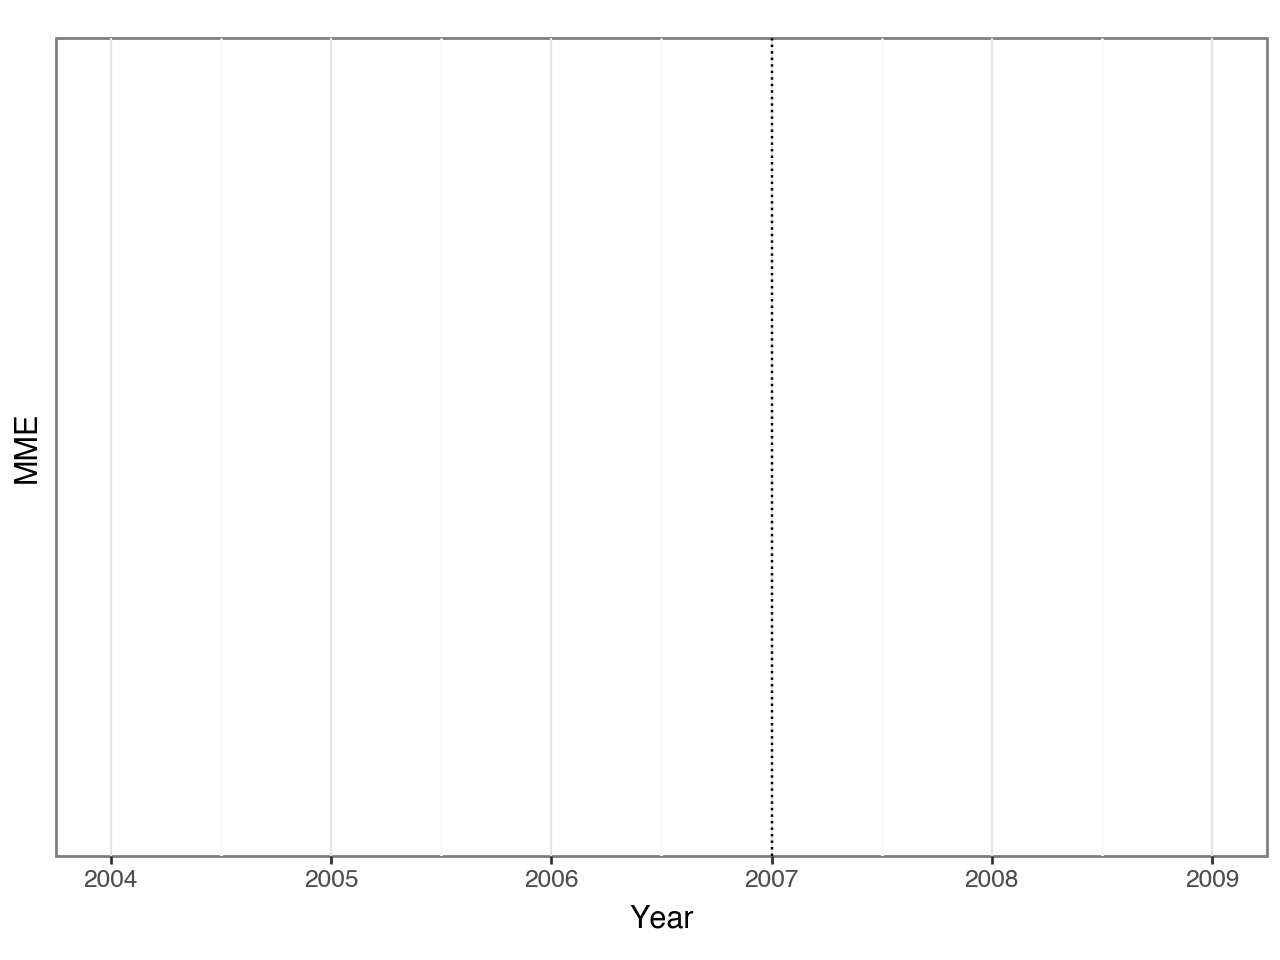

<Figure Size: (640 x 480)>

In [18]:
(
    ggplot()
    + geom_smooth(before_policy_texas, aes("Year", "MME"), method="lm", color="blue")
    + geom_vline(xintercept=2007, linetype="dotted")
    + scale_x_continuous(
        breaks=[2004, 2005, 2006, 2007, 2008, 2009], limits=[2004, 2009]
    )
    + theme_bw()
)

In [19]:
state = [
    "West Virginia",
    "New Hampshire",
    "Kentucky",
]  # using these states as control state for Texas
con_state = df[df.STATE.isin(state)]
bf = con_state[con_state.Year < 2007]
af = con_state[con_state.Year >= 2007]

/Users/keonnartey/miniconda3/lib/python3.10/site-packages/plotnine/stats/stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Users/keonnartey/miniconda3/lib/python3.10/site-packages/plotnine/stats/stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


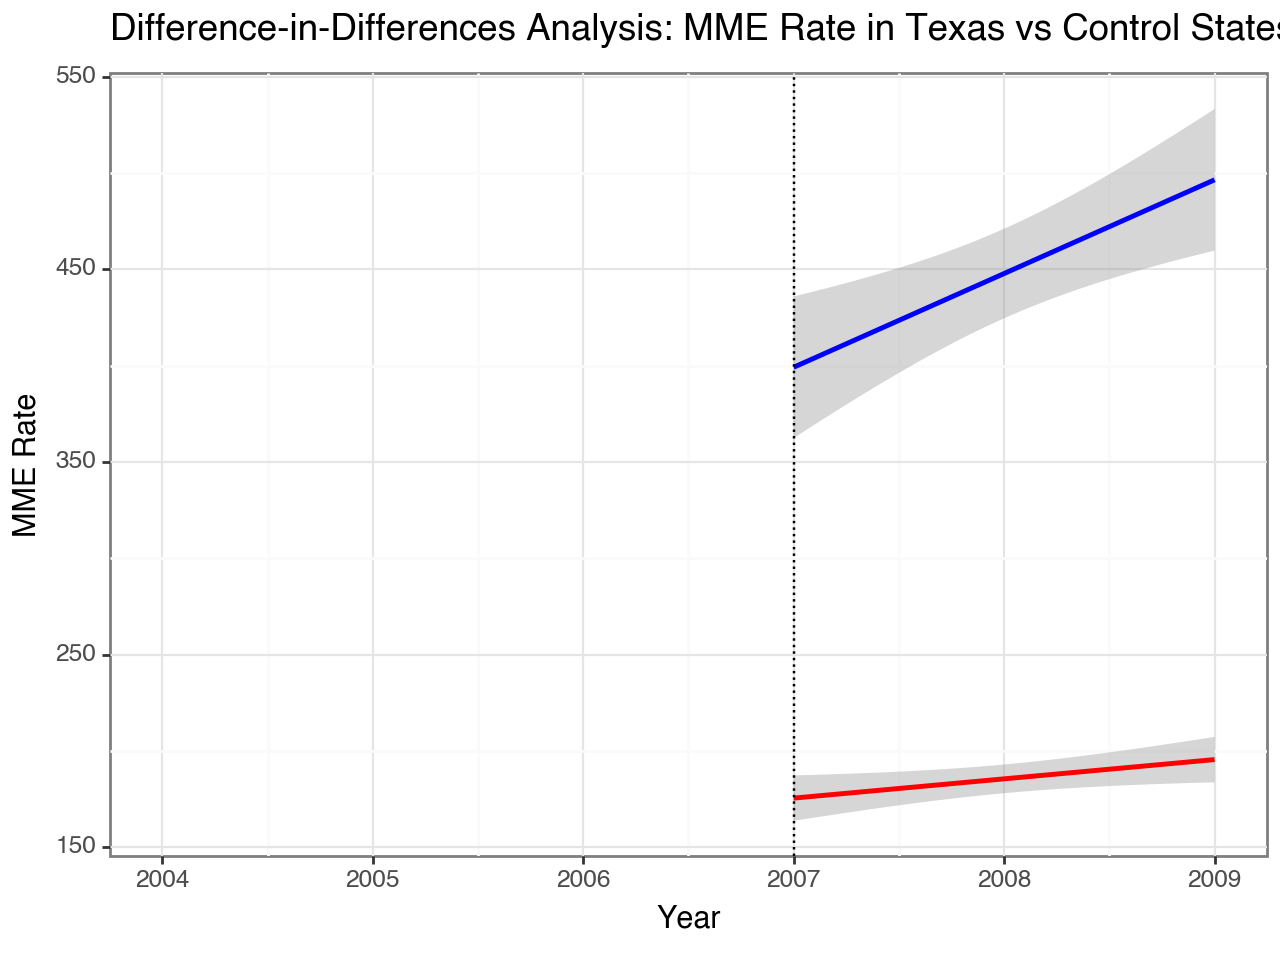

<Figure Size: (640 x 480)>

In [20]:
(
    ggplot()
    + geom_smooth(
        before_policy_texas, aes("Year", "MME Rate"), method="lm", color="red"
    )
    + geom_smooth(after_policy_texas, aes("Year", "MME Rate"), method="lm", color="red")
    + geom_smooth(bf, aes("Year", "MME Rate"), method="lm", color="blue")
    + geom_smooth(af, aes("Year", "MME Rate"), method="lm", color="blue")
    + geom_vline(xintercept=2007, linetype="dotted")
    + scale_x_continuous(
        breaks=[2004, 2005, 2006, 2007, 2008, 2009], limits=[2004, 2009]
    )
    + xlab("Year")
    + ylab("MME Rate")
    + labs(
        title="Difference-in-Differences Analysis: MME Rate in Texas vs Control States"
    )
    + theme_bw()
)

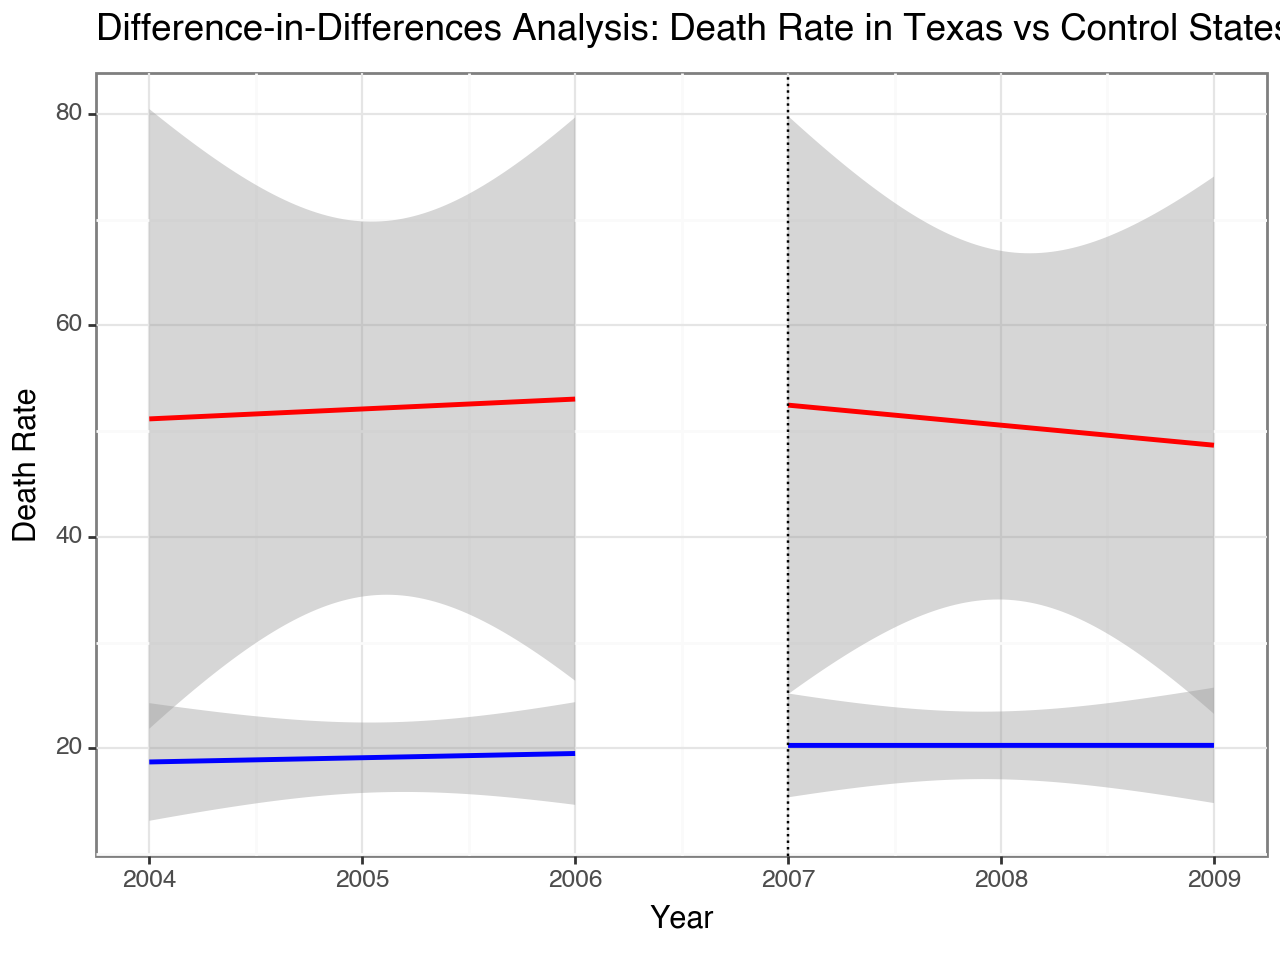

<Figure Size: (640 x 480)>

In [21]:
(
    ggplot()
    + geom_smooth(before_policy_texas, aes("Year", "Deaths"), method="lm", color="red")
    + geom_smooth(after_policy_texas, aes("Year", "Deaths"), method="lm", color="red")
    + geom_smooth(bf, aes("Year", "Deaths"), method="lm", color="blue")
    + geom_smooth(af, aes("Year", "Deaths"), method="lm", color="blue")
    + geom_vline(xintercept=2007, linetype="dotted")
    + scale_x_continuous(
        breaks=[2004, 2005, 2006, 2007, 2008, 2009], limits=[2004, 2009]
    )
    + xlab("Year")
    + ylab("Death Rate")
    + labs(
        title="Difference-in-Differences Analysis: Death Rate in Texas vs Control States"
    )
    + theme_bw()
)

#### Control State 3

Washington (the State, not Washington, DC), Effective Jan 2, 2012.

In [22]:
washington = df[df.STATE == "Washington"]

before_policy_washington = washington[
    washington.Year < 2012
]  # subsetting the data before the the policy
after_policy_washington = washington[
    washington.Year >= 2012
]  # a subset of the data after the policy was passed

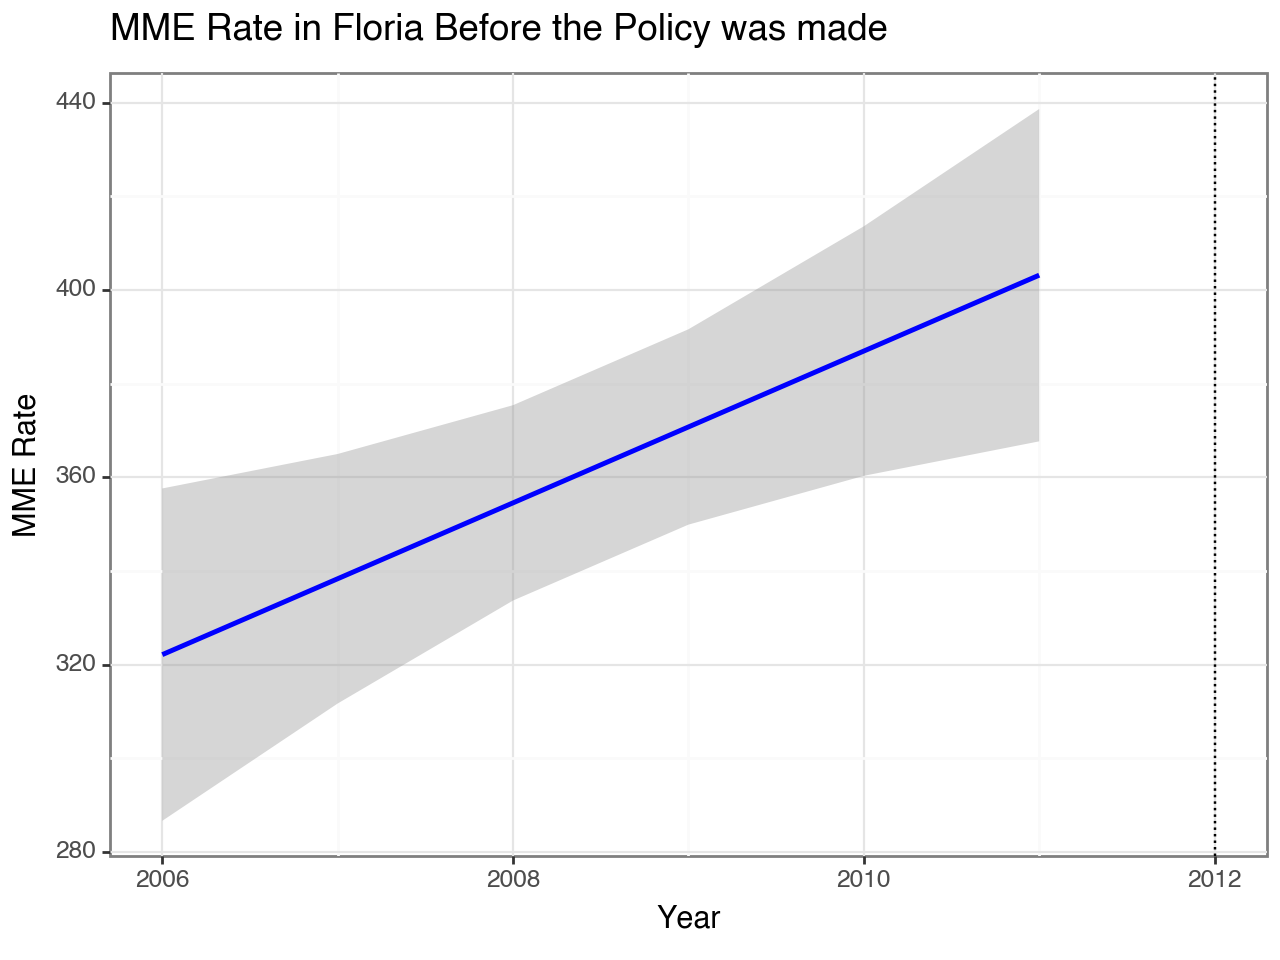

<Figure Size: (640 x 480)>

In [23]:
(
    ggplot()
    + geom_smooth(
        before_policy_washington, aes("Year", "MME Rate"), method="lm", color="blue"
    )
    + geom_vline(xintercept=2012, linetype="dotted")
    + xlab("Year")
    + ylab("MME Rate")
    + labs(title="MME Rate in Floria Before the Policy was made")
    + theme_bw()
)

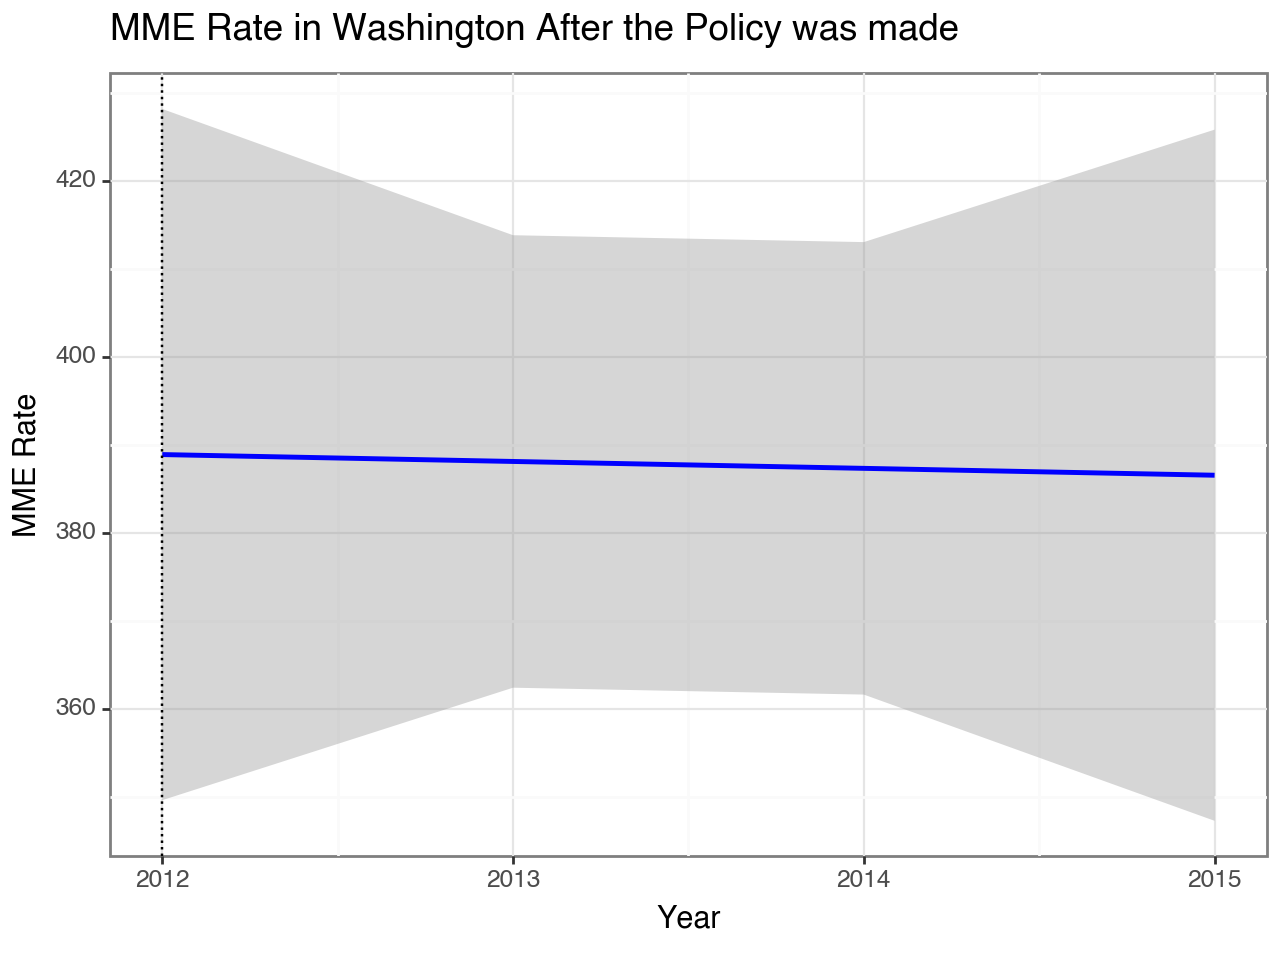

<Figure Size: (640 x 480)>

In [24]:
(
    ggplot()
    + geom_smooth(
        after_policy_washington, aes("Year", "MME Rate"), method="lm", color="blue"
    )
    + geom_vline(xintercept=2012, linetype="dotted")
    + xlab("Year")
    + ylab("MME Rate")
    + labs(title="MME Rate in Washington After the Policy was made")
    + theme_bw()
)

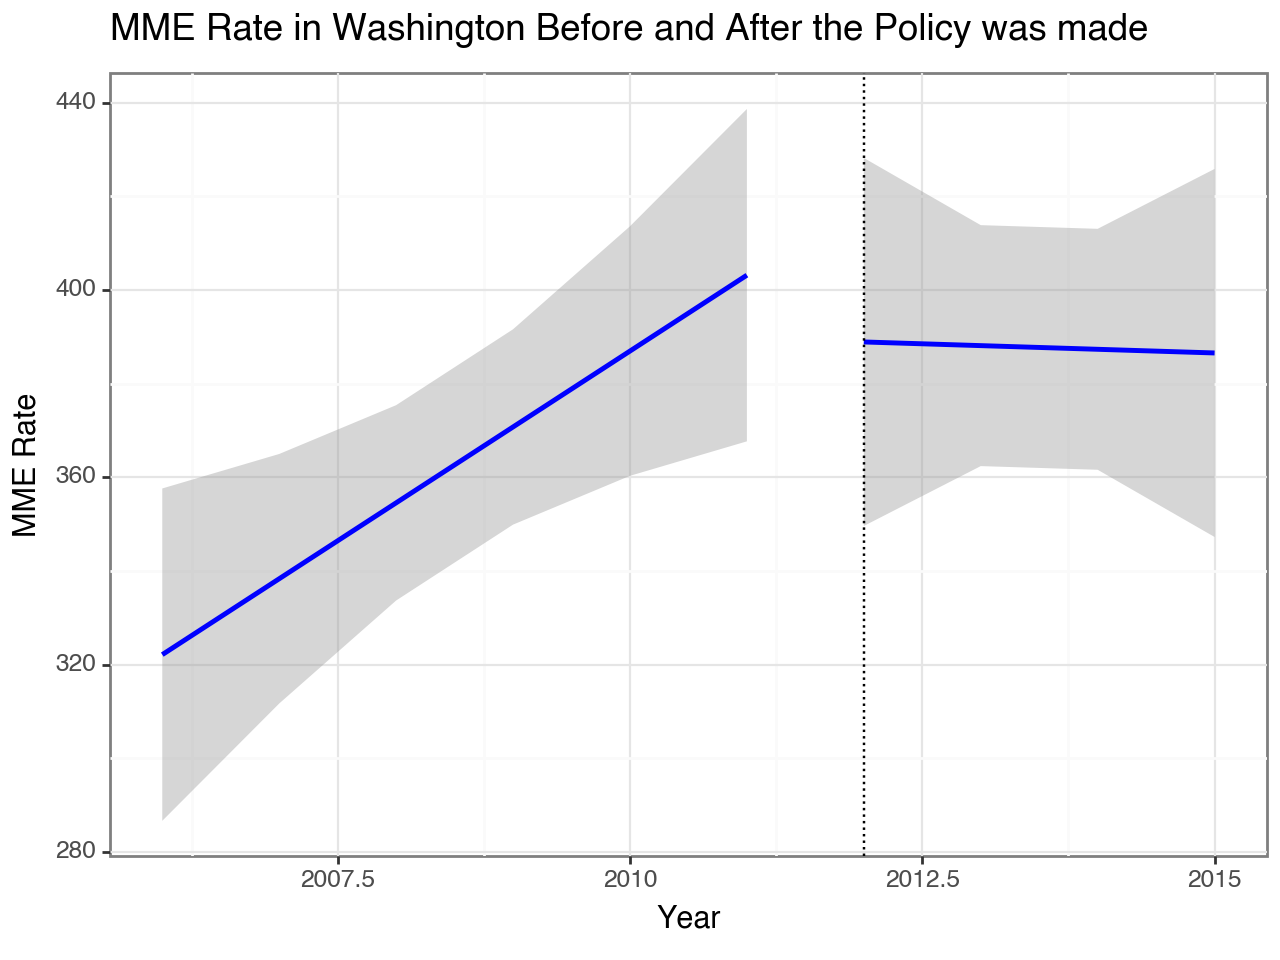

<Figure Size: (640 x 480)>

In [25]:
(
    ggplot()
    + geom_smooth(
        before_policy_washington, aes("Year", "MME Rate"), method="lm", color="blue"
    )
    + geom_smooth(
        after_policy_washington, aes("Year", "MME Rate"), method="lm", color="blue"
    )
    + geom_vline(xintercept=2012, linetype="dotted")
    + xlab("Year")
    + ylab("MME Rate")
    + labs(title="MME Rate in Washington Before and After the Policy was made")
    + theme_bw()
)

In [26]:
state_list_1 = [
    "Utah",
    "Hawaii",
    "Maine",
]  # using these states as control state for Florida
con_state_2 = df[df.STATE.isin(state_list_1)]
bf_2 = con_state_2[con_state_2.Year < 2012]
af_2 = con_state_2[con_state_2.Year >= 2012]

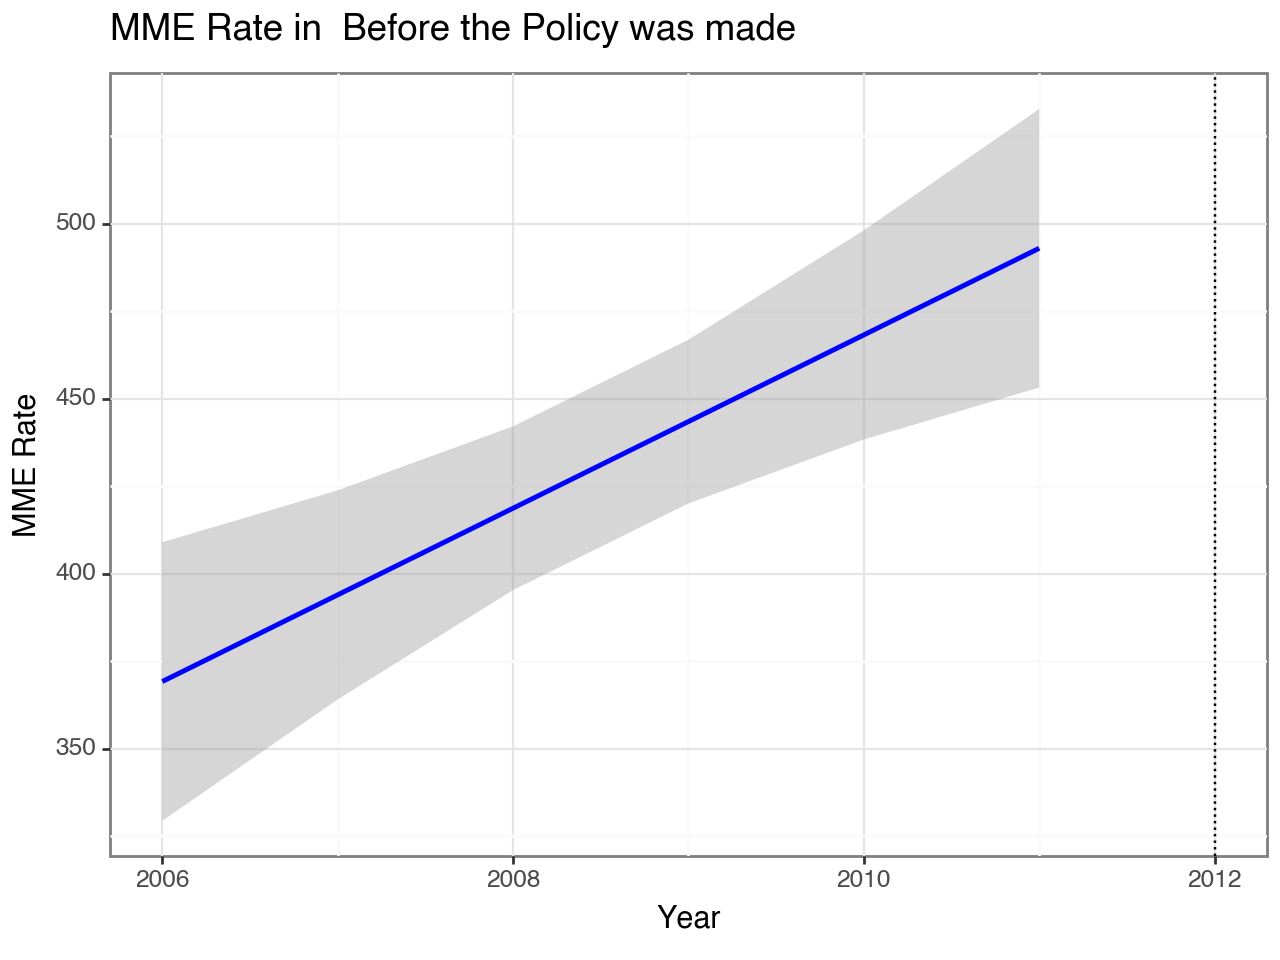

<Figure Size: (640 x 480)>

In [27]:
(
    ggplot()
    + geom_smooth(bf_2, aes("Year", "MME Rate"), method="lm", color="blue")
    + geom_vline(xintercept=2012, linetype="dotted")
    + xlab("Year")
    + ylab("MME Rate")
    + labs(title="MME Rate in  Before the Policy was made")
    + theme_bw()
)

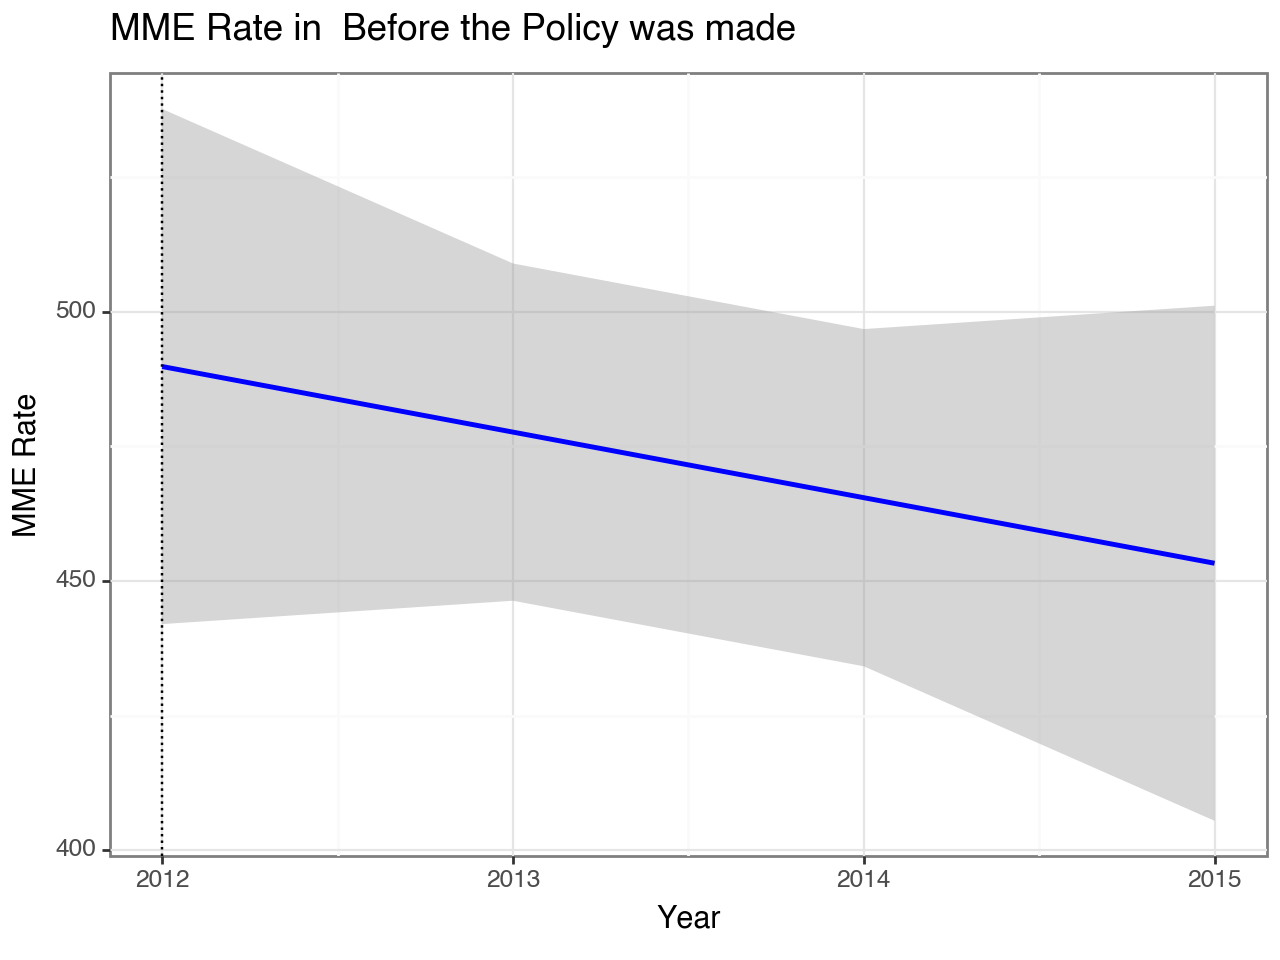

<Figure Size: (640 x 480)>

In [28]:
(
    ggplot()
    + geom_smooth(af_2, aes("Year", "MME Rate"), method="lm", color="blue")
    + geom_vline(xintercept=2012, linetype="dotted")
    + xlab("Year")
    + ylab("MME Rate")
    + labs(title="MME Rate in  Before the Policy was made")
    + theme_bw()
)

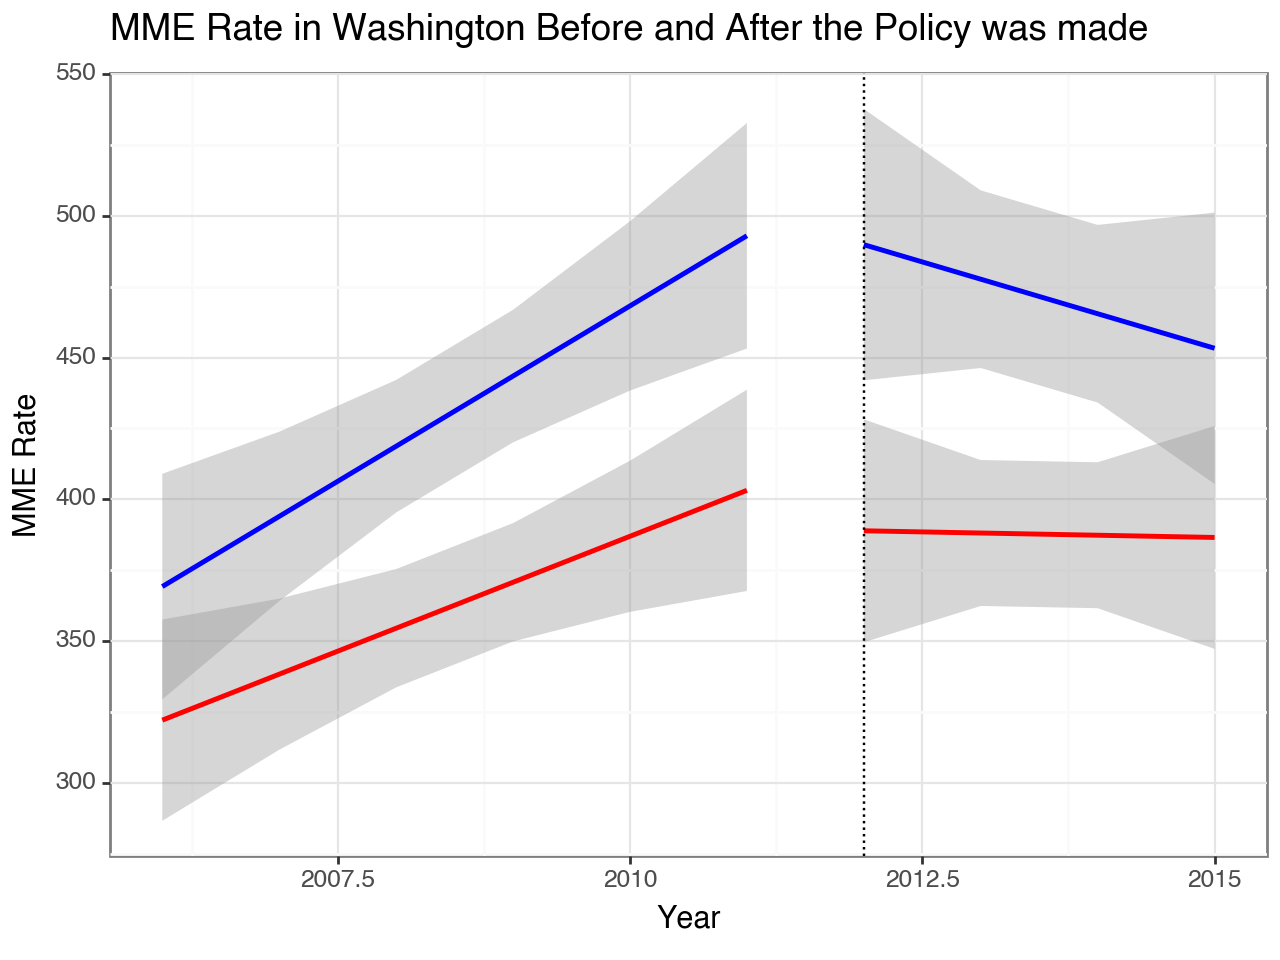

<Figure Size: (640 x 480)>

In [29]:
(
    ggplot()
    + geom_smooth(
        before_policy_washington, aes("Year", "MME Rate"), method="lm", color="red"
    )
    + geom_smooth(
        after_policy_washington, aes("Year", "MME Rate"), method="lm", color="red"
    )
    + geom_smooth(bf_2, aes("Year", "MME Rate"), method="lm", color="blue")
    + geom_smooth(af_2, aes("Year", "MME Rate"), method="lm", color="blue")
    + geom_vline(xintercept=2012, linetype="dotted")
    + xlab("Year")
    + ylab("MME Rate")
    + labs(title="MME Rate in Washington Before and After the Policy was made")
    + theme_bw()
)

control state 

Texas  = West Virginia, New Hampshire, Kentucky

Washington = Utah,Hawaii, Maine

Florida = Ohio, Pennsylvania , tennesse


Hawaii, Colorado, Utah, Oklahoma, Louisiana, Missouri, Indiana, West Virginia, South Carolina, Pennsylvania, New York, Maine, Connecticut, Massachusetts
 Massachusetts, Colorado, Maryland , Georgia, Indiana, Alabama